# Feature analisys and building new features


In [481]:
import pandas as pd
import numpy as np

data = pd.read_csv("../../datasets/DSGame/train.csv")
users = data.user_id.unique()

### Analisys is_listened feature

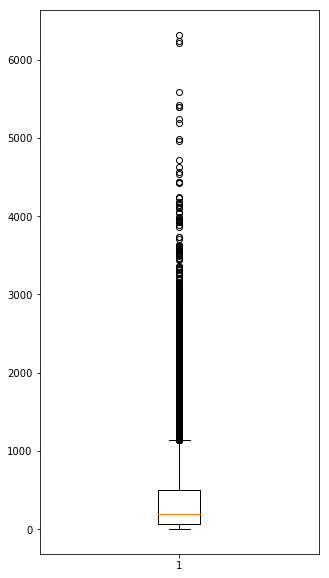

Median:  197.0
Users over the median: 9966
Users under the median: 9952


In [465]:
import matplotlib.pyplot as plt

y=data.groupby(by='user_id')['is_listened'].count()
x=data.user_id.unique()
fig = plt.figure(figsize=(5, 10))
ax=fig.add_subplot(111)

ax.boxplot(y)
plt.show()

mediana=data.groupby(by='user_id')['is_listened'].count().median()
check=np.array(data.groupby(by='user_id')['is_listened'].count()>=mediana)

t=check[check==True]
f=check[check==False]
is_listened_series = data.groupby(by='user_id')['is_listened'].count()
mediana = is_listened_series.median()
print("Median: ", mediana)
print("Users over the median:",len(t))
print("Users under the median:",len(f))

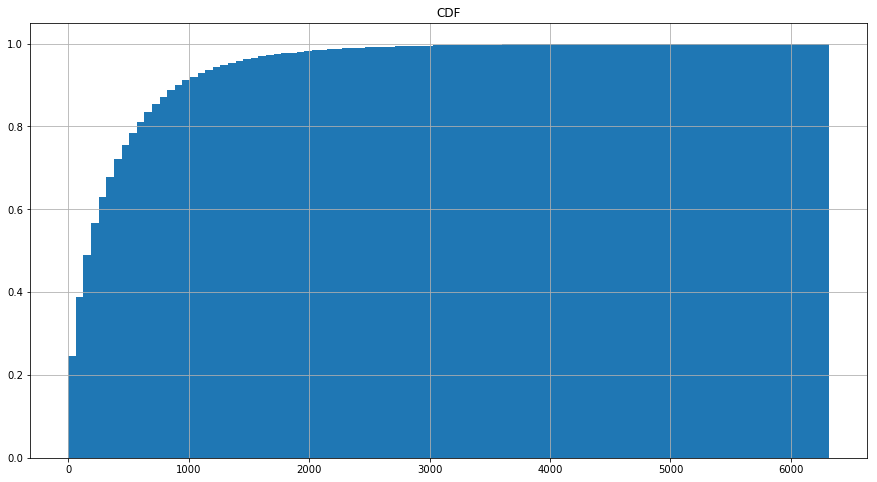

Quantile is_listened:


0.00       1.00
0.10      22.00
0.25      66.00
0.50     197.00
0.75     495.00
0.90     946.30
0.95    1344.60
0.99    2435.66
1.00    6317.00
Name: is_listened, dtype: float64

In [524]:
fig1 = plt.figure(figsize=(15, 8))
#ax1=fig1.add_subplot(111)
plt.title('CDF')
is_listened_series.hist(cumulative=True, normed=1, bins=100)
plt.show()
print("Quantile is_listened:")
quantile = is_listened_series.quantile([0, .1, .25, .5, .75, .90, .95, .99, 1])
quantile

### Estimate probabilty of is_listened

In [521]:
mediana = data.groupby(by='user_id')['is_listened'].count().median()
#i=0
ww=[]
for u in users:
    #i+=1
    ntot = data.loc[data['user_id']==u].count().unique()[0]
    listened = data.loc[(data['user_id']==u) & (data['is_listened']==1)].count().unique()[0]
    ww.append(weight_listened(n_is_listened=listened, ntot= ntot, threshold=mediana))
    #print(ntot, listened, ww[-1])
    #if(i==100):
    #   break;
ww

1 226 153 0.676991150442
2 40 23 0.515228426396
3 302 298 0.986754966887
4 1075 631 0.586976744186
5 998 932 0.933867735471
6 184 141 0.748730964467
7 3550 3519 0.991267605634
8 1291 1111 0.86057319907
9 1464 1046 0.714480874317
10 752 478 0.635638297872
11 470 256 0.544680851064
12 1084 1062 0.979704797048
13 1026 964 0.939571150097
14 2057 2031 0.98736023335
15 656 360 0.548780487805
16 1195 1096 0.917154811715
17 1512 1397 0.923941798942
18 305 302 0.990163934426
19 3283 2989 0.910447761194
20 1727 1511 0.874927620151
21 2285 2099 0.918599562363
22 1178 1130 0.959252971138
23 1097 921 0.839562443026
24 2500 1719 0.6876
25 474 247 0.521097046414
26 878 743 0.846241457859
27 486 261 0.537037037037
28 1599 355 0.222013758599
29 171 138 0.766497461929
30 885 357 0.403389830508
31 323 85 0.263157894737
32 3632 3426 0.943281938326
33 703 509 0.724039829303
34 2033 1112 0.54697491392
35 2524 2467 0.977416798732
36 1637 1603 0.979230299328
37 1939 1531 0.789582258896
38 943 211 0.2237539766

[0.67699115044247793,
 0.51522842639593902,
 0.98675496688741726,
 0.58697674418604651,
 0.93386773547094193,
 0.74873096446700504,
 0.99126760563380278,
 0.86057319907048802,
 0.71448087431693985,
 0.63563829787234039,
 0.5446808510638298,
 0.97970479704797053,
 0.93957115009746583,
 0.98736023334953815,
 0.54878048780487809,
 0.91715481171548119,
 0.92394179894179895,
 0.99016393442622952,
 0.91044776119402981,
 0.87492762015055003,
 0.91859956236323848,
 0.95925297113752117,
 0.83956244302643568,
 0.68759999999999999,
 0.52109704641350207,
 0.84624145785876992,
 0.53703703703703709,
 0.22201375859912445,
 0.76649746192893398,
 0.4033898305084746,
 0.26315789473684209,
 0.94328193832599116,
 0.72403982930298716,
 0.54697491392031483,
 0.97741679873217113,
 0.97923029932803907,
 0.78958225889633837,
 0.22375397667020147,
 0.16823464305478694,
 0.42298084929225643,
 0.99568345323741003,
 0.7464589235127479,
 0.83874580067189253,
 0.63200000000000001,
 0.95169811320754716,
 0.7817109144

In [523]:
support_features = pd.DataFrame({'prob_listened': pd.Series(data= ww, index= users)})
support_features

,prob_listened
9241,0.676991
16547,0.515228
7665,0.986755
1580,0.586977
1812,0.933868
10325,0.748731
51,0.991268
1089,0.860573
822,0.714481
2946,0.635638


In [546]:
'''
Stima la probabilità che un utente skippi una canzone
Se il la il numero di osservazioni ntot è minore della soglia, allora:
 1) la probabilità osservata non viene considerata significativa e viene settata a 0.5
 2) oppure viene calcolata tenendo conto della soglia
 altrimenti:
 la probabilità osservata è calcolata come canzoni non skippate fratto canzoni ascoltate
 NB: 0.5 è la massima incertezza, avvicinarsi a 0(alta % di skip) o a 1( bassa % di skip) da informazioni
 '''
def weight_listened(n_is_listened, ntot, threshold):
    if(ntot < threshold):
        #return (n_is_listened/ntot) * ((ntot+0.5*threshold)/(threshold+0.5*threshold))
        return 0.5 + (n_is_listened/ntot - 0.5) * ((ntot)/(threshold))# se la misura è poco significativa rispetto alla soglia mi allontano poco da 0.5
        #return 0.5
    else:
        return (n_is_listened/ntot)

In [552]:
# TEST
weight_listened(n_is_listened=2, ntot=10, threshold=197)

0.4847715736040609